In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import preprocessing
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

In [2]:
train_data=pd.read_csv("/Users/davidepiccoli/Desktop/data mining/project 2/ravdess_features_dm2/RavdessAudioOnlyFeatures_TRAIN.csv")
test_data=pd.read_csv("/Users/davidepiccoli/Desktop/data mining/project 2/ravdess_features_dm2/RavdessAudioOnlyFeatures_TEST.csv")

In [3]:
print(train_data.shape, test_data.shape)

(1828, 434) (624, 434)


In [4]:
train_data.describe()

,actor,frame_count,sum,mean,std,min,max,q01,q05,q25,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
count,1828.000000,1828.000000,1828.000000,1.828000e+03,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,...,1828.0,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.0,1828.000000,1828.000000
mean,9.295405,194588.269694,0.011480,2.631271e-08,0.020003,-0.163561,0.176284,-0.067207,-0.031204,-0.001011,...,1.0,0.120335,0.201699,0.456521,0.666192,0.842724,0.999818,1.0,-0.555631,-0.389952
std,5.079148,28480.301163,9.306631,4.929263e-05,0.020499,0.174879,0.193032,0.069398,0.031051,0.001624,...,0.0,0.130108,0.168295,0.167305,0.123141,0.078090,0.005041,0.0,0.776547,0.433813
min,1.000000,140941.000000,-151.120178,-9.435576e-04,0.000652,-0.998810,0.004669,-0.492982,-0.246616,-0.015625,...,1.0,0.000000,0.000000,0.000000,0.000000,0.007891,0.839625,1.0,-1.644320,-1.938627
25%,5.000000,171371.000000,-0.353432,-1.805578e-06,0.006509,-0.202370,0.053307,-0.085493,-0.040550,-0.001190,...,1.0,0.014703,0.051222,0.342588,0.609088,0.812227,1.000000,1.0,-1.007945,-0.636543
50%,9.000000,188989.000000,-0.036697,-2.047901e-07,0.013575,-0.100555,0.105606,-0.045059,-0.021912,-0.000397,...,1.0,0.070476,0.161748,0.475102,0.683680,0.855090,1.000000,1.0,-0.745296,-0.405489
75%,14.000000,214614.000000,0.199814,1.008195e-06,0.025762,-0.051682,0.219269,-0.022423,-0.010315,-0.000122,...,1.0,0.189830,0.335955,0.590281,0.747868,0.889619,1.000000,1.0,-0.316342,-0.156594
max,18.000000,304304.000000,240.889893,1.222810e-03,0.152168,-0.006134,0.999146,-0.002441,-0.000580,0.000000,...,1.0,0.645577,0.726413,0.834716,0.930228,0.986704,1.000000,1.0,7.127631,2.880807


In [5]:
train_data.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [6]:
train_data.isnull().sum()

modality               0
vocal_channel          0
emotion                0
emotional_intensity    0
statement              0
                      ..
stft_q75_w4            0
stft_q95_w4            0
stft_q99_w4            0
stft_kur_w4            0
stft_skew_w4           0
Length: 434, dtype: int64

# we decided to drop every columns where there was only 1 value for all the row, resulting in a shrink from 434 to 382

In [7]:
len(train_data["vocal_channel"].unique())

2

In [8]:
l1=[]
for column in train_data.columns:
    if len(train_data[column].unique())==1:
        l1.append(column)
        train_data.drop(column,axis=1,inplace=True)

In [9]:
len(l1)

52

In [10]:
l2=[]
for column in test_data.columns:
    if len(test_data[column].unique())==1:
        l2.append(column)
        test_data.drop(column,axis=1,inplace=True)

In [11]:
len(l2)

50

In [12]:
print(set(l1)-set(l2))

{'zc_q75_w2', 'zc_q75_w1'}


In [13]:
train_data.shape

(1828, 382)

In [14]:
test_data.shape

(624, 384)

# actor n°18 has only 60 rows, while every other actors, both on test and train have 104

In [15]:
#train_data["actor"].value_counts().plot(kind='bar')
#test_data["actor"].value_counts().plot(kind='bar')

In [16]:
train_num=train_data.loc[:, train_data.dtypes != object]
print(train_num.shape)

(1828, 375)


In [17]:
l=[]
for i in train_num.columns:
    if i == "length_w1":
        
        break
    print(i)
    l.append(i)
print(l)   

actor
frame_count
sum
mean
std
min
max
q01
q05
q25
q50
q75
q95
q99
kur
skew
lag1_sum
lag1_mean
lag1_std
lag1_min
lag1_max
lag1_q01
lag1_q05
lag1_q25
lag1_q75
lag1_q95
lag1_q99
lag1_kur
lag1_skew
zc_sum
zc_mean
zc_std
zc_q95
zc_kur
zc_skew
mfcc_sum
mfcc_mean
mfcc_std
mfcc_min
mfcc_max
mfcc_q01
mfcc_q05
mfcc_q25
mfcc_q50
mfcc_q75
mfcc_q95
mfcc_q99
mfcc_kur
mfcc_skew
sc_sum
sc_mean
sc_std
sc_min
sc_max
sc_q01
sc_q05
sc_q25
sc_q50
sc_q75
sc_q95
sc_q99
sc_kur
sc_skew
stft_sum
stft_mean
stft_std
stft_min
stft_q01
stft_q05
stft_q25
stft_q50
stft_q75
stft_kur
stft_skew
['actor', 'frame_count', 'sum', 'mean', 'std', 'min', 'max', 'q01', 'q05', 'q25', 'q50', 'q75', 'q95', 'q99', 'kur', 'skew', 'lag1_sum', 'lag1_mean', 'lag1_std', 'lag1_min', 'lag1_max', 'lag1_q01', 'lag1_q05', 'lag1_q25', 'lag1_q75', 'lag1_q95', 'lag1_q99', 'lag1_kur', 'lag1_skew', 'zc_sum', 'zc_mean', 'zc_std', 'zc_q95', 'zc_kur', 'zc_skew', 'mfcc_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max', 'mfcc_q01', 'mfcc_q05', 'm

In [18]:
train_without_time_series=train_num.loc[:,['actor', 'frame_count', 'sum', 'mean', 'std', 'min', 'max', 'kur', 'skew', 'zc_sum',
                         'zc_mean', 'zc_std', 'zc_kur', 'zc_skew', 'mfcc_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min',
                         'mfcc_max', 'mfcc_kur', 'mfcc_skew', 'sc_sum', 'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur',
                         'sc_skew', 'stft_sum', 'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew']]


In [19]:
"""fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(abs(train_without_time_series.corr(method='pearson'))>=0.9, vmin=1, vmax=-1, cmap="coolwarm", annot=True  )"""

'fig, ax = plt.subplots(figsize=(20,20))\nsns.heatmap(abs(train_without_time_series.corr(method=\'pearson\'))>=0.9, vmin=1, vmax=-1, cmap="coolwarm", annot=True  )'

In [20]:
train_data.drop(['stft_skew', 'mfcc_min', 'zc_mean', 'zc_kur', 'zc_skew', 'min', 'max', "sc_sum", "filename" ],axis=1,inplace=True)

In [21]:
test_data.drop(['stft_skew', 'mfcc_min', 'zc_mean', 'zc_kur', 'zc_skew', 'min', 'max', "sc_sum", "filename","zc_q75_w1", "zc_q75_w2" ],axis=1,inplace=True)

In [22]:
test_num=test_data.loc[:, test_data.dtypes != object]
test_cat=test_data.loc[:, test_data.dtypes == object]
test_cat.drop(["emotion"],axis=1,inplace=True)

/var/folders/jy/36zwwdh52ng42mzs1hc5r_5m0000gn/T/ipykernel_93541/1891417763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cat.drop(["emotion"],axis=1,inplace=True)


In [23]:
train_num=train_data.loc[:, train_data.dtypes != object]
train_cat=train_data.loc[:, train_data.dtypes == object]
train_cat.drop(["emotion"],axis=1,inplace=True)

/var/folders/jy/36zwwdh52ng42mzs1hc5r_5m0000gn/T/ipykernel_93541/1150695506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat.drop(["emotion"],axis=1,inplace=True)


In [24]:
test_frames=[test_num,test_cat]
test_final=pd.concat(test_frames,axis=1)

In [25]:
frames=[train_num,train_cat]
train_final=pd.concat(frames,axis=1)

In [26]:
test_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 372 columns):
 #    Column               Dtype  
---   ------               -----  
 0    actor                int64  
 1    frame_count          int64  
 2    sum                  float64
 3    mean                 float64
 4    std                  float64
 5    q01                  float64
 6    q05                  float64
 7    q25                  float64
 8    q50                  float64
 9    q75                  float64
 10   q95                  float64
 11   q99                  float64
 12   kur                  float64
 13   skew                 float64
 14   lag1_sum             float64
 15   lag1_mean            float64
 16   lag1_std             float64
 17   lag1_min             float64
 18   lag1_max             float64
 19   lag1_q01             float64
 20   lag1_q05             float64
 21   lag1_q25             float64
 22   lag1_q75             float64
 23   lag1_q95     

In [27]:
train_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 372 columns):
 #    Column               Dtype  
---   ------               -----  
 0    actor                int64  
 1    frame_count          int64  
 2    sum                  float64
 3    mean                 float64
 4    std                  float64
 5    q01                  float64
 6    q05                  float64
 7    q25                  float64
 8    q50                  float64
 9    q75                  float64
 10   q95                  float64
 11   q99                  float64
 12   kur                  float64
 13   skew                 float64
 14   lag1_sum             float64
 15   lag1_mean            float64
 16   lag1_std             float64
 17   lag1_min             float64
 18   lag1_max             float64
 19   lag1_q01             float64
 20   lag1_q05             float64
 21   lag1_q25             float64
 22   lag1_q75             float64
 23   lag1_q95   

## dimensionality reduction

In [28]:
y = np.array(train_data['emotion'])

In [29]:
le = preprocessing.LabelEncoder()
for column_name in train_final.columns:
    if train_final[column_name].dtype == object:
        train_final[column_name] = le.fit_transform(train_final[column_name])
    else:
        pass

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_num, y, test_size=0.3, 
                                                    random_state=100, stratify=y)

In [31]:
X_train.shape

(1279, 367)

In [32]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.37158469945355194
F1-score [0.48167539 0.49411765 0.2247191  0.28395062 0.33707865 0.42857143
 0.30872483 0.32      ]
              precision    recall  f1-score   support

       angry      0.430     0.548     0.482        84
        calm      0.488     0.500     0.494        84
     disgust      0.222     0.227     0.225        44
     fearful      0.295     0.274     0.284        84
       happy      0.319     0.357     0.337        84
     neutral      0.429     0.429     0.429        42
         sad      0.354     0.274     0.309        84
   surprised      0.375     0.279     0.320        43

    accuracy                          0.372       549
   macro avg      0.364     0.361     0.360       549
weighted avg      0.369     0.372     0.367       549



In [33]:
#plt.hist((np.var(X_train, axis=0))[np.var(X_train, axis=0 ) < 9.37927341e-09  ])
#print(np.var(train_good_norm, axis=0)[np.var(train_good_norm, axis=0) > 4.32296153e+09 ])
#plt.yscale('log')
#plt.show()

In [34]:
pd.set_option('display.max_rows', 500)
print(np.var(X_train["frame_count"], axis=0))


806761498.0036353


## find a good threshold such that the accuracy is optimized here

In [35]:
#plt.hist(np.var(X_train, axis=0)[np.var(X_train, axis=0 ) < 900000  ])
#plt.yscale('log')
#plt.show()
#list(np.var(X_train, axis=0)[np.var(X_train, axis=0) > 200000])



In [36]:
sel = VarianceThreshold(threshold=0.474204595)
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(1279, 174)

In [37]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.42987249544626593
F1-score [0.52747253 0.50887574 0.27160494 0.42285714 0.35928144 0.41558442
 0.35365854 0.53012048]
              precision    recall  f1-score   support

       angry      0.490     0.571     0.527        84
        calm      0.506     0.512     0.509        84
     disgust      0.297     0.250     0.272        44
     fearful      0.407     0.440     0.423        84
       happy      0.361     0.357     0.359        84
     neutral      0.457     0.381     0.416        42
         sad      0.362     0.345     0.354        84
   surprised      0.550     0.512     0.530        43

    accuracy                          0.430       549
   macro avg      0.429     0.421     0.424       549
weighted avg      0.427     0.430     0.427       549



In [38]:
"""list_of_thresholds=[2.31055954e-17, 9.48409190e-02, 1.89681838e-01, 2.84522757e-01,
        3.79363676e-01, 4.74204595e-01, 5.69045514e-01, 6.63886433e-01,
        7.58727352e-01, 8.53568271e-01, 9.48409190e-01]

accuracy_scores=[]

for threshold in list_of_thresholds:
    sel = VarianceThreshold(threshold=threshold)
    X_train_sel = sel.fit_transform(X_train)
    X_test_sel = sel.transform(X_test)

    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
    clf.fit(X_train_sel, y_train)

    y_pred = clf.predict(X_test_sel)
    
    print('Accuracy %s' % accuracy_score(y_test, y_pred), threshold)
    
    z=accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(z)
    
sns.lineplot(x=list_of_thresholds, y=accuracy_scores, marker='o')
plt.ylabel('accuracy')
plt.xlabel('threshold')
plt.show()"""
    
    

"list_of_thresholds=[2.31055954e-17, 9.48409190e-02, 1.89681838e-01, 2.84522757e-01,\n        3.79363676e-01, 4.74204595e-01, 5.69045514e-01, 6.63886433e-01,\n        7.58727352e-01, 8.53568271e-01, 9.48409190e-01]\n\naccuracy_scores=[]\n\nfor threshold in list_of_thresholds:\n    sel = VarianceThreshold(threshold=threshold)\n    X_train_sel = sel.fit_transform(X_train)\n    X_test_sel = sel.transform(X_test)\n\n    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)\n    clf.fit(X_train_sel, y_train)\n\n    y_pred = clf.predict(X_test_sel)\n    \n    print('Accuracy %s' % accuracy_score(y_test, y_pred), threshold)\n    \n    z=accuracy_score(y_test, y_pred)\n    \n    accuracy_scores.append(z)\n    \nsns.lineplot(x=list_of_thresholds, y=accuracy_scores, marker='o')\nplt.ylabel('accuracy')\nplt.xlabel('threshold')\nplt.show()"

In [39]:
sel_columns=[]

for column in X_train:
    if X_train[column].var()> 0.474204595:
        sel_columns.append(column)

print(sel_columns)

['actor', 'frame_count', 'sum', 'kur', 'lag1_kur', 'zc_sum', 'mfcc_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_max', 'mfcc_q01', 'mfcc_q05', 'mfcc_q25', 'mfcc_q50', 'mfcc_q75', 'mfcc_q95', 'mfcc_q99', 'mfcc_kur', 'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_q01', 'sc_q05', 'sc_q25', 'sc_q50', 'sc_q75', 'sc_q95', 'sc_q99', 'stft_sum', 'length_w1', 'sum_w1', 'kur_w1', 'skew_w1', 'lag1_kur_w1', 'lag1_skew_w1', 'zc_sum_w1', 'zc_kur_w1', 'zc_skew_w1', 'mfcc_sum_w1', 'mfcc_mean_w1', 'mfcc_std_w1', 'mfcc_min_w1', 'mfcc_max_w1', 'mfcc_q01_w1', 'mfcc_q05_w1', 'mfcc_q25_w1', 'mfcc_q50_w1', 'mfcc_q75_w1', 'mfcc_q95_w1', 'mfcc_q99_w1', 'mfcc_kur_w1', 'sc_sum_w1', 'sc_mean_w1', 'sc_std_w1', 'sc_min_w1', 'sc_max_w1', 'sc_q01_w1', 'sc_q05_w1', 'sc_q25_w1', 'sc_q50_w1', 'sc_q75_w1', 'sc_q95_w1', 'sc_q99_w1', 'sc_kur_w1', 'sc_skew_w1', 'stft_sum_w1', 'stft_kur_w1', 'stft_skew_w1', 'length_w2', 'sum_w2', 'kur_w2', 'lag1_kur_w2', 'zc_sum_w2', 'zc_kur_w2', 'mfcc_sum_w2', 'mfcc_mean_w2', 'mfcc_std_w2', 'mfcc_min_

In [40]:
train_data_num=train_data.loc[:, train_data.dtypes != object]

sel = VarianceThreshold(threshold=0.474204595)
train_sel = sel.fit_transform(train_data_num)
train_sel = pd.DataFrame(train_sel, columns=sel_columns)

In [41]:
train_sel.shape

(1828, 174)

In [42]:
test_sel = test_data[sel_columns]

In [43]:
test_sel

,actor,frame_count,sum,kur,lag1_kur,zc_sum,mfcc_sum,mfcc_mean,mfcc_std,mfcc_max,...,sc_q05_w4,sc_q25_w4,sc_q50_w4,sc_q75_w4,sc_q95_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_kur_w4
0,19,161762,0.475616,11.392131,27.908376,6914,-185091.597475,-29.286645,172.090423,238.067483,...,5972.243167,8195.778271,9121.554218,10041.725010,11120.746102,11704.526728,-0.389589,-0.476916,727.157574,-0.260279
1,19,155355,0.120148,13.621589,42.184398,6932,-177839.591263,-29.249933,171.375407,228.448708,...,5908.247494,7170.967974,9561.173331,11186.861414,11582.523798,11856.402666,-1.261399,-0.396969,637.658102,-0.428900
2,19,160160,-0.599304,7.678162,59.173624,9418,-181697.868716,-29.025219,170.958988,227.401299,...,6298.587809,7466.224410,9177.280207,9794.040046,11227.823275,11965.987675,-0.548618,-0.212367,672.592436,0.626916
3,19,158558,-0.080383,14.511231,43.718458,8686,-183699.720428,-29.628987,168.719126,224.906515,...,7212.387125,7969.218641,8762.907534,9882.683892,10745.314501,11495.219384,-0.966908,0.173125,704.158385,-0.825144
4,19,176176,0.152222,8.944732,139.907840,9674,-204624.188622,-29.655680,179.013415,204.603472,...,3936.366435,8493.923917,9926.499570,10780.217065,11572.842210,11777.983822,2.327035,-1.593457,780.167518,-0.536669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,24,219419,0.423157,6.520678,80.379368,15787,-264009.939482,-30.770389,131.174261,181.801757,...,2426.159633,7124.124853,9465.933074,9825.431365,10034.042184,10145.507697,-0.230367,-1.213402,791.637319,-0.495689
620,24,217817,-1.375854,14.590263,40.644555,17053,-245411.449442,-28.804161,116.716024,186.612589,...,2503.120563,4776.274447,5662.021516,6717.846923,9569.567182,10099.677098,-0.207094,0.289277,688.266594,-0.877851
621,24,206606,0.573761,6.947965,30.113873,15855,-225213.091603,-27.872907,118.957076,175.597276,...,2519.017778,5151.407589,6873.031650,7647.269820,9177.984373,9627.394302,-0.550877,-0.536569,619.688792,-0.997740
622,24,203404,0.792572,6.107496,38.211619,17077,-211833.281301,-26.612221,114.252079,178.413828,...,2459.783919,5306.555431,6433.235498,8246.142830,9243.660055,9564.758914,-0.646994,-0.421549,714.314900,-0.670500


In [44]:
train_sel

,actor,frame_count,sum,kur,lag1_kur,zc_sum,mfcc_sum,mfcc_mean,mfcc_std,mfcc_max,...,sc_q05_w4,sc_q25_w4,sc_q50_w4,sc_q75_w4,sc_q95_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_kur_w4
0,1.0,158558.0,0.145081,15.028520,51.787204,8015.0,-197329.278906,-31.827303,165.355352,236.703871,...,8928.597851,10439.979745,10988.558485,11538.700552,12001.173890,12055.440843,25.150642,-4.175609,740.409892,6.742190
1,1.0,160160.0,0.114319,16.488415,42.127435,8491.0,-196963.570413,-31.463829,163.853142,218.363733,...,7328.169993,9721.736881,11278.935139,11806.006801,12000.329080,12030.975508,-0.096686,-1.100390,705.975006,-0.700420
2,1.0,156956.0,0.149963,17.035218,54.529269,7384.0,-193866.638041,-31.574371,163.238841,229.029214,...,8117.809961,9711.644575,10827.840288,11775.554003,12050.192845,12110.642050,16.082550,-3.120218,694.365924,1.688986
3,1.0,152152.0,0.139618,21.824521,53.008445,8237.0,-184150.973286,-30.897814,162.217347,216.240664,...,6943.991628,8998.702287,10469.485907,11101.756609,11585.803219,11866.485679,-0.332682,-0.880988,663.205667,-0.594111
4,1.0,169769.0,0.137665,13.236022,44.373537,7839.0,-218952.728640,-32.974809,172.859991,230.432203,...,7045.094766,9178.275961,10995.412094,11527.428532,11991.767348,12098.967760,0.054656,-1.071109,741.412796,0.126535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,18.0,168168.0,-0.154480,6.504521,41.185338,8349.0,-227313.337694,-34.546100,159.099528,184.163537,...,0.000000,8504.050807,10398.483268,11981.322435,12000.000000,12001.776389,0.904699,-1.472070,660.790616,0.262900
1824,18.0,174575.0,-0.139679,9.706586,65.761796,10439.0,-212587.010178,-31.171116,143.246956,159.600309,...,0.000000,7511.014887,9096.162496,11983.643068,12005.137708,12121.501758,0.947101,-1.301303,634.120979,-0.857759
1825,18.0,169770.0,-0.210968,5.874582,57.209661,7439.0,-213371.196654,-32.134216,143.883952,161.279633,...,5496.940032,7559.625245,9989.188322,11390.153616,12006.516678,12189.000574,2.505409,-1.472613,631.801688,-0.656632
1826,18.0,185786.0,-0.085876,4.482247,35.742894,12605.0,-228990.432092,-31.541382,138.269051,162.661713,...,0.000000,7603.873380,9677.603883,11149.816263,12000.000000,12015.176166,-0.020476,-1.160818,680.117724,-0.499022


In [45]:
test_sel

,actor,frame_count,sum,kur,lag1_kur,zc_sum,mfcc_sum,mfcc_mean,mfcc_std,mfcc_max,...,sc_q05_w4,sc_q25_w4,sc_q50_w4,sc_q75_w4,sc_q95_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_kur_w4
0,19,161762,0.475616,11.392131,27.908376,6914,-185091.597475,-29.286645,172.090423,238.067483,...,5972.243167,8195.778271,9121.554218,10041.725010,11120.746102,11704.526728,-0.389589,-0.476916,727.157574,-0.260279
1,19,155355,0.120148,13.621589,42.184398,6932,-177839.591263,-29.249933,171.375407,228.448708,...,5908.247494,7170.967974,9561.173331,11186.861414,11582.523798,11856.402666,-1.261399,-0.396969,637.658102,-0.428900
2,19,160160,-0.599304,7.678162,59.173624,9418,-181697.868716,-29.025219,170.958988,227.401299,...,6298.587809,7466.224410,9177.280207,9794.040046,11227.823275,11965.987675,-0.548618,-0.212367,672.592436,0.626916
3,19,158558,-0.080383,14.511231,43.718458,8686,-183699.720428,-29.628987,168.719126,224.906515,...,7212.387125,7969.218641,8762.907534,9882.683892,10745.314501,11495.219384,-0.966908,0.173125,704.158385,-0.825144
4,19,176176,0.152222,8.944732,139.907840,9674,-204624.188622,-29.655680,179.013415,204.603472,...,3936.366435,8493.923917,9926.499570,10780.217065,11572.842210,11777.983822,2.327035,-1.593457,780.167518,-0.536669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,24,219419,0.423157,6.520678,80.379368,15787,-264009.939482,-30.770389,131.174261,181.801757,...,2426.159633,7124.124853,9465.933074,9825.431365,10034.042184,10145.507697,-0.230367,-1.213402,791.637319,-0.495689
620,24,217817,-1.375854,14.590263,40.644555,17053,-245411.449442,-28.804161,116.716024,186.612589,...,2503.120563,4776.274447,5662.021516,6717.846923,9569.567182,10099.677098,-0.207094,0.289277,688.266594,-0.877851
621,24,206606,0.573761,6.947965,30.113873,15855,-225213.091603,-27.872907,118.957076,175.597276,...,2519.017778,5151.407589,6873.031650,7647.269820,9177.984373,9627.394302,-0.550877,-0.536569,619.688792,-0.997740
622,24,203404,0.792572,6.107496,38.211619,17077,-211833.281301,-26.612221,114.252079,178.413828,...,2459.783919,5306.555431,6433.235498,8246.142830,9243.660055,9564.758914,-0.646994,-0.421549,714.314900,-0.670500


## PCA

In [46]:
scaler = MinMaxScaler()
train_final_norm = scaler.fit_transform(train_final)
train_final_norm=pd.DataFrame(train_final_norm, columns=train_final.columns)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train_final_norm, y, test_size=0.3, 
                                                    random_state=100, stratify=y)

In [48]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [49]:
X_train_pca.shape

(1279, 2)

In [50]:
y_train_ohe=le.fit_transform(y_train)

In [51]:
print(y_train_ohe)

[0 3 1 ... 6 6 1]


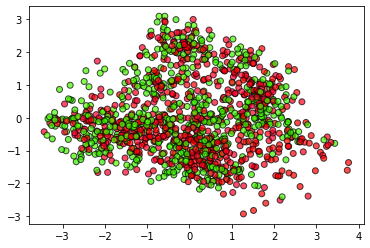

In [52]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_ohe, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [53]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.17486338797814208
F1-score [0.30434783 0.13186813 0.12345679 0.16969697 0.1871345  0.08955224
 0.12790698 0.18421053]
              precision    recall  f1-score   support

       angry       0.28      0.33      0.30        84
        calm       0.12      0.14      0.13        84
     disgust       0.14      0.11      0.12        44
     fearful       0.17      0.17      0.17        84
       happy       0.18      0.19      0.19        84
     neutral       0.12      0.07      0.09        42
         sad       0.12      0.13      0.13        84
   surprised       0.21      0.16      0.18        43

    accuracy                           0.17       549
   macro avg       0.17      0.16      0.16       549
weighted avg       0.17      0.17      0.17       549



In [54]:
"""plt.plot(PCA(n_components=10).fit(train_final).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()"""

'plt.plot(PCA(n_components=10).fit(train_final).explained_variance_ratio_, lw=3, color=\'r\', ms=2)\nplt.title("PCA")\nplt.ylabel("Fraction of Variance")\nplt.show()'

In [55]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [56]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.2659380692167577
F1-score [0.42328042 0.32954545 0.20689655 0.23312883 0.17391304 0.19277108
 0.20512821 0.26506024]
              precision    recall  f1-score   support

       angry       0.38      0.48      0.42        84
        calm       0.32      0.35      0.33        84
     disgust       0.21      0.20      0.21        44
     fearful       0.24      0.23      0.23        84
       happy       0.18      0.17      0.17        84
     neutral       0.20      0.19      0.19        42
         sad       0.22      0.19      0.21        84
   surprised       0.28      0.26      0.27        43

    accuracy                           0.27       549
   macro avg       0.25      0.26      0.25       549
weighted avg       0.26      0.27      0.26       549



<Figure size 432x288 with 0 Axes>

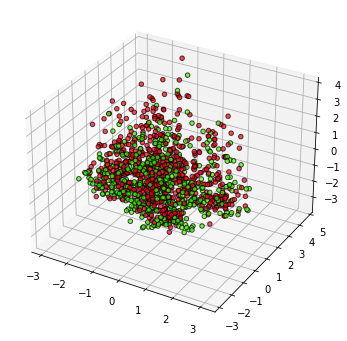

In [57]:
fig = plt.figure()
figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

zdata = X_train_pca[:, 0]
xdata = X_train_pca[:, 1]
ydata = X_train_pca[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=y_train_ohe, cmap=plt.cm.prism, edgecolor='k', alpha=0.7);

## OUTLIER DETECTION

In [58]:
df = train_sel
X = df.values
y = np.array(train_data['emotion'])

In [59]:
scl = StandardScaler()
X = scl.fit_transform(X)
X=pd.DataFrame(X, columns= train_sel.columns)

In [60]:
X.shape

(1828, 174)

In [61]:
train_sel_norm = scaler.fit_transform(train_sel)
train_sel_norm=pd.DataFrame(train_sel_norm, columns=train_sel.columns)

## HBOS

In [62]:
pip install pyod

Note: you may need to restart the kernel to use updated packages.


In [63]:
from pyod.models.hbos import HBOS

In [64]:
clf = HBOS()
clf.fit(X)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [65]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1645,  183]))

In [66]:
"""plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()"""

"plt.hist(clf.decision_scores_, bins=20)\nplt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')\nplt.show()"

In [67]:
dec_score= clf.decision_scores_
dec_score_l= list(dec_score)
dec_score_l.sort(reverse=True)
print(dec_score_l[:18])

[328.59612372370805, 319.3218306894363, 317.56459249342834, 316.162286883781, 314.5654633244597, 314.21946054279954, 313.80005932957005, 309.22913361021335, 306.7649202957465, 306.623704090778, 304.9441272806049, 304.89768628220077, 302.72340197329686, 302.6749502802496, 302.53127085138124, 301.6762822229034, 301.2145526774565, 301.0523035692378]


In [68]:
print(dec_score_l[:106])

[328.59612372370805, 319.3218306894363, 317.56459249342834, 316.162286883781, 314.5654633244597, 314.21946054279954, 313.80005932957005, 309.22913361021335, 306.7649202957465, 306.623704090778, 304.9441272806049, 304.89768628220077, 302.72340197329686, 302.6749502802496, 302.53127085138124, 301.6762822229034, 301.2145526774565, 301.0523035692378, 300.031571689133, 298.9755675674963, 297.91648640192557, 297.2997034948607, 297.1494280569284, 295.8481587197523, 295.8457522974676, 295.2282825635551, 294.891530778028, 294.00289573051697, 293.81065652361303, 293.79715393696233, 293.5623992574813, 292.99198977427216, 292.3773474739485, 292.1346468410769, 292.05573983380486, 292.0398850308111, 292.0181048222138, 291.9092931347588, 291.78023346067926, 291.60857341565526, 291.4727283673519, 290.95011882035425, 290.8476111936602, 290.512813390593, 289.41183756205334, 289.2026038336419, 288.711574159722, 288.5722295329166, 288.1487688846843, 288.04830066080774, 286.90142725482997, 286.824374058612

In [69]:
index_list1 =[]
dec_score= clf.decision_scores_
dec_score_l= list(dec_score)
for e in dec_score_l:
    if e>  274.9735354199347:
        ind=dec_score_l.index(e)
        index_list1.append(ind)


In [70]:
print(index_list1)

[0, 8, 32, 34, 35, 40, 41, 42, 92, 93, 94, 95, 240, 241, 243, 248, 249, 250, 251, 256, 257, 285, 287, 292, 300, 302, 303, 308, 309, 311, 346, 352, 382, 421, 425, 460, 481, 484, 485, 486, 536, 539, 553, 554, 555, 560, 561, 562, 563, 589, 613, 614, 656, 657, 658, 659, 832, 852, 853, 864, 903, 1005, 1075, 1083, 1177, 1283, 1352, 1357, 1358, 1360, 1361, 1367, 1390, 1480, 1481, 1505, 1681, 1688, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1714, 1721, 1729, 1738, 1744, 1745, 1748, 1750, 1752, 1756, 1757, 1758, 1759, 1761, 1762, 1765, 1800, 1801, 1819]


In [71]:
pca = PCA(n_components=2)
pca.fit(train_sel_norm)
X_train_pca = pca.transform(train_sel_norm)

In [72]:
"""plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=outliers,
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()"""

"plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=outliers,\n            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)\nplt.show()"

In [73]:
pca = PCA(n_components=3)
pca.fit(train_sel_norm)
X_train_pca = pca.transform(train_sel_norm)

<Figure size 432x288 with 0 Axes>

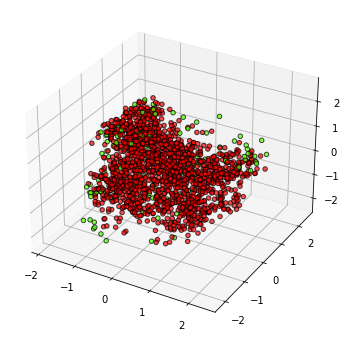

In [74]:
fig = plt.figure()
figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

zdata = X_train_pca[:, 0]
xdata = X_train_pca[:, 1]
ydata = X_train_pca[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=outliers, cmap=plt.cm.prism, edgecolor='k', alpha=0.7);

## LOF

In [75]:
from pyod.models.lof import LOF

In [76]:
clf = LOF()
clf.fit(X)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [77]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1660,  168]))

In [78]:
"""plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()"""

"plt.hist(clf.decision_scores_, bins=20)\nplt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')\nplt.show()"

In [79]:
dec_score= clf.decision_scores_
dec_score_l= list(dec_score)
dec_score_l.sort(reverse=True)
print(dec_score_l[:18])

[2.939933021997724, 2.676978323047991, 2.644217216264477, 2.5759369761888267, 2.515046444599238, 2.5043080510990943, 2.5034917604164844, 2.445295113624907, 2.4406013195128686, 2.2414405674096787, 2.2179047785512407, 2.1924338843231057, 2.0783729503637387, 2.0683648962847947, 2.0148921365104693, 2.0140301184020695, 1.991460210297917, 1.9520598239797327]


In [80]:
print(dec_score_l[:106])

[2.939933021997724, 2.676978323047991, 2.644217216264477, 2.5759369761888267, 2.515046444599238, 2.5043080510990943, 2.5034917604164844, 2.445295113624907, 2.4406013195128686, 2.2414405674096787, 2.2179047785512407, 2.1924338843231057, 2.0783729503637387, 2.0683648962847947, 2.0148921365104693, 2.0140301184020695, 1.991460210297917, 1.9520598239797327, 1.8484711636269513, 1.8271003801156387, 1.7724664714850227, 1.772261538595627, 1.7704815829798481, 1.7639747313581609, 1.7535056375206068, 1.730218276245587, 1.7149970715063911, 1.6876078939097567, 1.674539409799845, 1.668149931346314, 1.6559521581560834, 1.6512849554417066, 1.614319678208912, 1.6037994934316384, 1.5881632433445225, 1.5834816182186973, 1.5717747584035477, 1.5713938806524022, 1.5699256761767693, 1.5695797939860014, 1.562050536420538, 1.537245911109348, 1.5368639261408723, 1.5304600850335786, 1.52657928398199, 1.5206797600708923, 1.509913886028767, 1.5043573611693655, 1.4995294360496711, 1.4941027155528843, 1.4929642220985

In [81]:
index_list2 =[]
dec_score= clf.decision_scores_
dec_score_l= list(dec_score)
for e in dec_score_l:
    if e> 1.3192662279426912:
        ind=dec_score_l.index(e)
        index_list2.append(ind)

In [82]:
print(index_list2)

[0, 2, 8, 53, 59, 124, 148, 156, 223, 229, 314, 315, 324, 332, 352, 361, 382, 425, 460, 461, 484, 546, 589, 633, 636, 651, 656, 698, 741, 771, 820, 826, 832, 840, 841, 844, 852, 853, 855, 856, 869, 878, 971, 979, 1047, 1058, 1083, 1160, 1206, 1228, 1259, 1281, 1295, 1296, 1301, 1352, 1358, 1360, 1363, 1367, 1398, 1406, 1409, 1411, 1421, 1480, 1481, 1483, 1485, 1492, 1496, 1497, 1503, 1504, 1507, 1512, 1513, 1540, 1552, 1556, 1580, 1583, 1597, 1604, 1612, 1688, 1702, 1703, 1704, 1707, 1709, 1717, 1719, 1738, 1757, 1758, 1765, 1766, 1796, 1800, 1801, 1815, 1816, 1817, 1818]


In [83]:
pca = PCA(n_components=2)
pca.fit(train_sel_norm)
X_train_pca = pca.transform(train_sel_norm)

In [84]:
"""plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=outliers,
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()"""

"plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=outliers,\n            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)\nplt.show()"

In [85]:
pca = PCA(n_components=3)
pca.fit(train_sel_norm)
X_train_pca = pca.transform(train_sel_norm)

<Figure size 432x288 with 0 Axes>

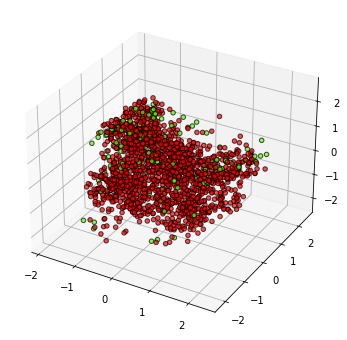

In [86]:
fig = plt.figure()
figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

zdata = X_train_pca[:, 0]
xdata = X_train_pca[:, 1]
ydata = X_train_pca[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=outliers, cmap=plt.cm.prism, edgecolor='k', alpha=0.7);

## ABOD

In [87]:
from pyod.models.abod import ABOD

In [88]:
clf = ABOD()
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [89]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1586,  242]))

In [90]:
"""plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()"""

"plt.hist(clf.decision_scores_, bins=20)\nplt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')\nplt.show()"

In [91]:
dec_score= clf.decision_scores_
dec_score_l= list(dec_score)
dec_score_l.sort(reverse=True)
print(dec_score_l[:18])

[-9.00933607590685e-09, -1.47762649025825e-08, -1.601094941033139e-08, -3.731213049593138e-08, -4.464337829911832e-08, -4.93710559849725e-08, -4.955434076359791e-08, -5.109279043986184e-08, -5.695892786222238e-08, -5.874611040462735e-08, -8.085418753355862e-08, -9.17250026530679e-08, -1.0170313016575454e-07, -1.0715810196099671e-07, -1.0807457344225286e-07, -1.1255060593238045e-07, -1.1317968356329525e-07, -1.3533514252680764e-07]


In [92]:
print(dec_score_l[:106])

[-9.00933607590685e-09, -1.47762649025825e-08, -1.601094941033139e-08, -3.731213049593138e-08, -4.464337829911832e-08, -4.93710559849725e-08, -4.955434076359791e-08, -5.109279043986184e-08, -5.695892786222238e-08, -5.874611040462735e-08, -8.085418753355862e-08, -9.17250026530679e-08, -1.0170313016575454e-07, -1.0715810196099671e-07, -1.0807457344225286e-07, -1.1255060593238045e-07, -1.1317968356329525e-07, -1.3533514252680764e-07, -1.408631020532639e-07, -1.5779914584824507e-07, -1.616827419817446e-07, -1.716374956999853e-07, -1.9220853559204504e-07, -1.9243393416512628e-07, -2.2459786371665273e-07, -2.3769694451023809e-07, -2.4085662635063346e-07, -2.505087252315087e-07, -2.7473347823320097e-07, -2.84662362270425e-07, -2.8899218703568067e-07, -2.924785137298215e-07, -3.009621834161668e-07, -3.1290302306525135e-07, -3.202620556949507e-07, -3.2365195718276024e-07, -3.301864341749027e-07, -3.428398657606139e-07, -3.4589711424791676e-07, -3.493781025040166e-07, -3.589755882075041e-07, -3.

In [93]:
index_list3 =[]
dec_score= clf.decision_scores_
dec_score_l= list(dec_score)
for e in dec_score_l:
    if e> -8.567480967783233e-07:
        ind=dec_score_l.index(e)
        index_list3.append(ind)

In [94]:
print(index_list3)

[0, 8, 32, 35, 40, 122, 124, 148, 223, 229, 235, 248, 253, 256, 258, 292, 352, 356, 361, 460, 467, 546, 565, 589, 653, 656, 657, 659, 668, 683, 698, 708, 741, 757, 768, 771, 784, 820, 826, 841, 842, 843, 856, 860, 878, 927, 942, 970, 982, 983, 1012, 1031, 1047, 1048, 1058, 1083, 1160, 1186, 1194, 1228, 1241, 1247, 1281, 1296, 1352, 1358, 1360, 1372, 1396, 1398, 1409, 1410, 1454, 1480, 1488, 1492, 1496, 1505, 1512, 1540, 1553, 1556, 1579, 1580, 1583, 1596, 1599, 1604, 1701, 1703, 1704, 1707, 1714, 1717, 1719, 1738, 1756, 1757, 1758, 1766, 1775, 1796, 1801, 1816, 1819]


In [95]:
pca = PCA(n_components=2)
pca.fit(train_sel_norm)
X_train_pca = pca.transform(train_sel_norm)

In [96]:
"""plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=outliers,
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()"""

"plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=outliers,\n            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)\nplt.show()"

In [97]:
pca = PCA(n_components=3)
pca.fit(train_sel_norm)
X_train_pca = pca.transform(train_sel_norm)

<Figure size 432x288 with 0 Axes>

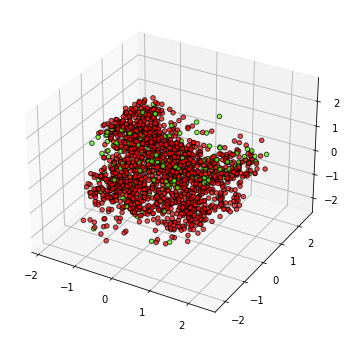

In [98]:
fig = plt.figure()
figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

zdata = X_train_pca[:, 0]
xdata = X_train_pca[:, 1]
ydata = X_train_pca[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=outliers, cmap=plt.cm.prism, edgecolor='k', alpha=0.7);

## Now we remove the most common outliers among the three methods implemented

In [99]:
set1 = set(index_list1)
set2 = set(index_list2)
set3 = set(index_list3)

In [100]:
set4=set1.intersection(set2).intersection(set3)

In [101]:
len(set4)

18

In [102]:
set4

{0,
 8,
 352,
 460,
 589,
 656,
 1083,
 1352,
 1358,
 1360,
 1480,
 1703,
 1704,
 1707,
 1738,
 1757,
 1758,
 1801}

In [103]:
train_sel.drop(set4, inplace=True)

In [104]:
train_sel

,actor,frame_count,sum,kur,lag1_kur,zc_sum,mfcc_sum,mfcc_mean,mfcc_std,mfcc_max,...,sc_q05_w4,sc_q25_w4,sc_q50_w4,sc_q75_w4,sc_q95_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_kur_w4
1,1.0,160160.0,0.114319,16.488415,42.127435,8491.0,-196963.570413,-31.463829,163.853142,218.363733,...,7328.169993,9721.736881,11278.935139,11806.006801,12000.329080,12030.975508,-0.096686,-1.100390,705.975006,-0.700420
2,1.0,156956.0,0.149963,17.035218,54.529269,7384.0,-193866.638041,-31.574371,163.238841,229.029214,...,8117.809961,9711.644575,10827.840288,11775.554003,12050.192845,12110.642050,16.082550,-3.120218,694.365924,1.688986
3,1.0,152152.0,0.139618,21.824521,53.008445,8237.0,-184150.973286,-30.897814,162.217347,216.240664,...,6943.991628,8998.702287,10469.485907,11101.756609,11585.803219,11866.485679,-0.332682,-0.880988,663.205667,-0.594111
4,1.0,169769.0,0.137665,13.236022,44.373537,7839.0,-218952.728640,-32.974809,172.859991,230.432203,...,7045.094766,9178.275961,10995.412094,11527.428532,11991.767348,12098.967760,0.054656,-1.071109,741.412796,0.126535
5,1.0,172972.0,0.140289,19.658058,43.496743,5747.0,-214042.246890,-31.663054,167.015657,234.713732,...,3767.842932,8141.840119,11273.058219,11992.237735,12015.317805,12113.314691,1.573901,-1.512306,755.905381,1.823902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,18.0,168168.0,-0.154480,6.504521,41.185338,8349.0,-227313.337694,-34.546100,159.099528,184.163537,...,0.000000,8504.050807,10398.483268,11981.322435,12000.000000,12001.776389,0.904699,-1.472070,660.790616,0.262900
1824,18.0,174575.0,-0.139679,9.706586,65.761796,10439.0,-212587.010178,-31.171116,143.246956,159.600309,...,0.000000,7511.014887,9096.162496,11983.643068,12005.137708,12121.501758,0.947101,-1.301303,634.120979,-0.857759
1825,18.0,169770.0,-0.210968,5.874582,57.209661,7439.0,-213371.196654,-32.134216,143.883952,161.279633,...,5496.940032,7559.625245,9989.188322,11390.153616,12006.516678,12189.000574,2.505409,-1.472613,631.801688,-0.656632
1826,18.0,185786.0,-0.085876,4.482247,35.742894,12605.0,-228990.432092,-31.541382,138.269051,162.661713,...,0.000000,7603.873380,9677.603883,11149.816263,12000.000000,12015.176166,-0.020476,-1.160818,680.117724,-0.499022


In [105]:
test_sel

,actor,frame_count,sum,kur,lag1_kur,zc_sum,mfcc_sum,mfcc_mean,mfcc_std,mfcc_max,...,sc_q05_w4,sc_q25_w4,sc_q50_w4,sc_q75_w4,sc_q95_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_kur_w4
0,19,161762,0.475616,11.392131,27.908376,6914,-185091.597475,-29.286645,172.090423,238.067483,...,5972.243167,8195.778271,9121.554218,10041.725010,11120.746102,11704.526728,-0.389589,-0.476916,727.157574,-0.260279
1,19,155355,0.120148,13.621589,42.184398,6932,-177839.591263,-29.249933,171.375407,228.448708,...,5908.247494,7170.967974,9561.173331,11186.861414,11582.523798,11856.402666,-1.261399,-0.396969,637.658102,-0.428900
2,19,160160,-0.599304,7.678162,59.173624,9418,-181697.868716,-29.025219,170.958988,227.401299,...,6298.587809,7466.224410,9177.280207,9794.040046,11227.823275,11965.987675,-0.548618,-0.212367,672.592436,0.626916
3,19,158558,-0.080383,14.511231,43.718458,8686,-183699.720428,-29.628987,168.719126,224.906515,...,7212.387125,7969.218641,8762.907534,9882.683892,10745.314501,11495.219384,-0.966908,0.173125,704.158385,-0.825144
4,19,176176,0.152222,8.944732,139.907840,9674,-204624.188622,-29.655680,179.013415,204.603472,...,3936.366435,8493.923917,9926.499570,10780.217065,11572.842210,11777.983822,2.327035,-1.593457,780.167518,-0.536669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,24,219419,0.423157,6.520678,80.379368,15787,-264009.939482,-30.770389,131.174261,181.801757,...,2426.159633,7124.124853,9465.933074,9825.431365,10034.042184,10145.507697,-0.230367,-1.213402,791.637319,-0.495689
620,24,217817,-1.375854,14.590263,40.644555,17053,-245411.449442,-28.804161,116.716024,186.612589,...,2503.120563,4776.274447,5662.021516,6717.846923,9569.567182,10099.677098,-0.207094,0.289277,688.266594,-0.877851
621,24,206606,0.573761,6.947965,30.113873,15855,-225213.091603,-27.872907,118.957076,175.597276,...,2519.017778,5151.407589,6873.031650,7647.269820,9177.984373,9627.394302,-0.550877,-0.536569,619.688792,-0.997740
622,24,203404,0.792572,6.107496,38.211619,17077,-211833.281301,-26.612221,114.252079,178.413828,...,2459.783919,5306.555431,6433.235498,8246.142830,9243.660055,9564.758914,-0.646994,-0.421549,714.314900,-0.670500


## support vector machine

In [106]:
scaler = MinMaxScaler()
train_final_norm = scaler.fit_transform(train_final)
train_final_norm=pd.DataFrame(train_final_norm, columns=train_final.columns)

In [107]:
train_final["vocal_channel"]

0       1
1       1
2       1
3       1
4       1
       ..
1823    1
1824    1
1825    1
1826    1
1827    1
Name: vocal_channel, Length: 1828, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(train_final_norm, y, test_size=0.3, 
                                                    random_state=100, stratify=y)

In [109]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [110]:
y_train_ohe=le.fit_transform(y_train)

In [111]:
"""plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= y_train_ohe, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()"""

"plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= y_train_ohe, \n            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)\nplt.show()"

In [112]:
from sklearn.svm import LinearSVC

In [113]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.604735883424408
F1-score [0.84662577 0.59649123 0.50632911 0.67065868 0.60465116 0.46511628
 0.45882353 0.55555556]
              precision    recall  f1-score   support

       angry       0.87      0.82      0.85        84
        calm       0.59      0.61      0.60        84
     disgust       0.57      0.45      0.51        44
     fearful       0.67      0.67      0.67        84
       happy       0.59      0.62      0.60        84
     neutral       0.45      0.48      0.47        42
         sad       0.45      0.46      0.46        84
   surprised       0.53      0.58      0.56        43

    accuracy                           0.60       549
   macro avg       0.59      0.59      0.59       549
weighted avg       0.61      0.60      0.61       549



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [114]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5519125683060109
F1-score [0.7826087  0.57364341 0.44117647 0.67073171 0.42735043 0.47368421
 0.31007752 0.528     ]
              precision    recall  f1-score   support

       angry       0.82      0.75      0.78        84
        calm       0.43      0.88      0.57        84
     disgust       0.62      0.34      0.44        44
     fearful       0.69      0.65      0.67        84
       happy       0.76      0.30      0.43        84
     neutral       0.53      0.43      0.47        42
         sad       0.44      0.24      0.31        84
   surprised       0.40      0.77      0.53        43

    accuracy                           0.55       549
   macro avg       0.59      0.54      0.53       549
weighted avg       0.60      0.55      0.54       549



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [115]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.40255009107468126
F1-score [0.67619048 0.51405622 0.04347826 0.39772727 0.32214765 0.
 0.12765957 0.4       ]
              precision    recall  f1-score   support

       angry       0.56      0.85      0.68        84
        calm       0.39      0.76      0.51        84
     disgust       0.50      0.02      0.04        44
     fearful       0.38      0.42      0.40        84
       happy       0.37      0.29      0.32        84
     neutral       0.00      0.00      0.00        42
         sad       0.16      0.11      0.13        84
   surprised       0.40      0.40      0.40        43

    accuracy                           0.40       549
   macro avg       0.35      0.35      0.31       549
weighted avg       0.36      0.40      0.35       549



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
"""decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]"""

'decision_function = clf.decision_function(X_train)\nsupport_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]\nsupport_vectors = X_train[support_vector_indices]'

## non linear svm

In [117]:
from sklearn.svm import SVC

In [118]:
clf = SVC(gamma='auto', C=54, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6083788706739527
F1-score [0.83229814 0.64242424 0.65957447 0.63414634 0.57803468 0.48351648
 0.41463415 0.58139535]
              precision    recall  f1-score   support

       angry       0.87      0.80      0.83        84
        calm       0.65      0.63      0.64        84
     disgust       0.62      0.70      0.66        44
     fearful       0.65      0.62      0.63        84
       happy       0.56      0.60      0.58        84
     neutral       0.45      0.52      0.48        42
         sad       0.42      0.40      0.41        84
   surprised       0.58      0.58      0.58        43

    accuracy                           0.61       549
   macro avg       0.60      0.61      0.60       549
weighted avg       0.61      0.61      0.61       549



In [119]:
clf = SVC(gamma='auto', C=10000, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6265938069216758
F1-score [0.82716049 0.69461078 0.62222222 0.63953488 0.63492063 0.41463415
 0.4969697  0.50704225]
              precision    recall  f1-score   support

       angry       0.86      0.80      0.83        84
        calm       0.70      0.69      0.69        84
     disgust       0.61      0.64      0.62        44
     fearful       0.62      0.65      0.64        84
       happy       0.57      0.71      0.63        84
     neutral       0.42      0.40      0.41        42
         sad       0.51      0.49      0.50        84
   surprised       0.64      0.42      0.51        43

    accuracy                           0.63       549
   macro avg       0.62      0.60      0.60       549
weighted avg       0.63      0.63      0.63       549



In [120]:
clf = SVC(gamma='auto', C=54, kernel='linear', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6156648451730419
F1-score [0.83435583 0.64634146 0.65934066 0.625      0.57923497 0.42352941
 0.4939759  0.57142857]
              precision    recall  f1-score   support

       angry       0.86      0.81      0.83        84
        calm       0.66      0.63      0.65        84
     disgust       0.64      0.68      0.66        44
     fearful       0.60      0.65      0.62        84
       happy       0.54      0.63      0.58        84
     neutral       0.42      0.43      0.42        42
         sad       0.50      0.49      0.49        84
   surprised       0.74      0.47      0.57        43

    accuracy                           0.62       549
   macro avg       0.62      0.60      0.60       549
weighted avg       0.62      0.62      0.62       549



In [121]:
clf = SVC(gamma='auto', C=10000, kernel='linear', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6156648451730419
F1-score [0.83435583 0.64634146 0.65934066 0.625      0.57923497 0.42352941
 0.4939759  0.57142857]
              precision    recall  f1-score   support

       angry       0.86      0.81      0.83        84
        calm       0.66      0.63      0.65        84
     disgust       0.64      0.68      0.66        44
     fearful       0.60      0.65      0.62        84
       happy       0.54      0.63      0.58        84
     neutral       0.42      0.43      0.42        42
         sad       0.50      0.49      0.49        84
   surprised       0.74      0.47      0.57        43

    accuracy                           0.62       549
   macro avg       0.62      0.60      0.60       549
weighted avg       0.62      0.62      0.62       549



In [122]:
clf = SVC(gamma='auto', C=1000, kernel='poly', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6411657559198543
F1-score [0.86419753 0.70114943 0.68888889 0.65088757 0.62427746 0.43010753
 0.47435897 0.59259259]
              precision    recall  f1-score   support

       angry       0.90      0.83      0.86        84
        calm       0.68      0.73      0.70        84
     disgust       0.67      0.70      0.69        44
     fearful       0.65      0.65      0.65        84
       happy       0.61      0.64      0.62        84
     neutral       0.39      0.48      0.43        42
         sad       0.51      0.44      0.47        84
   surprised       0.63      0.56      0.59        43

    accuracy                           0.64       549
   macro avg       0.63      0.63      0.63       549
weighted avg       0.64      0.64      0.64       549



In [123]:
q= np.array(test_data['emotion'])

In [124]:
qt=le.fit_transform(q)

In [125]:
qe = preprocessing.LabelEncoder()
for column_name in test_final.columns:
    if test_final[column_name].dtype == object:
        test_final[column_name] = qe.fit_transform(test_final[column_name])
    else:
        pass

In [126]:
scaler = MinMaxScaler()
test_final_norm = scaler.fit_transform(test_final)
test_final_norm=pd.DataFrame(test_final_norm, columns=test_final.columns)

In [127]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(test_final, q, test_size=0.3, 
                                                    random_state=100, stratify=q)

In [132]:
clf = SVC(gamma='auto', C=1000, kernel='poly', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(test_final_norm)

print('Accuracy %s' % accuracy_score(q, y_pred))
print('F1-score %s' % f1_score(q, y_pred, average=None))
print(classification_report(q, y_pred))

Accuracy 0.47435897435897434
F1-score [0.56666667 0.58715596 0.475      0.36734694 0.3537415  0.40384615
 0.38993711 0.49462366]
              precision    recall  f1-score   support

       angry       0.42      0.89      0.57        96
        calm       0.52      0.67      0.59        96
     disgust       0.59      0.40      0.48        48
     fearful       0.53      0.28      0.37        96
       happy       0.51      0.27      0.35        96
     neutral       0.38      0.44      0.40        48
         sad       0.49      0.32      0.39        96
   surprised       0.51      0.48      0.49        48

    accuracy                           0.47       624
   macro avg       0.49      0.47      0.45       624
weighted avg       0.49      0.47      0.45       624



In [133]:
clf.score(X_train, y_train)

0.8647380766223612

In [129]:
clf.support_

array([   0,    5,    6, ..., 1261, 1270, 1272], dtype=int32)

In [130]:
support_vectors_pca = pca.transform(clf.support_vectors_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [131]:
"""plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_ohe, 
            cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()"""

"plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_ohe, \n            cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)\nplt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,\n                linewidth=1, facecolors='none', edgecolors='k')\nplt.show()"